**2017 Fuel Economy**

This project is to determine the fuel economy of a 2004 Ford Focus in for the year 2017.

What is the average fuel economy for the whole year?

Are there changes to the Fuel economy over time?

What are contributing factors to fuel economy that are described in this data?


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import datetime as dt
from scipy import stats

In [3]:

Econ = pd.read_excel("~/R_work/Focus_svt_log.ods", engine="odf")

Econ.head()

,year,month,day,miles,gallons,cost
0,2012,11,16,138334,10.061,34.5
1,2012,11,29,139560,9.553,34.0
2,2012,12,2,139737,8.001,28.0
3,2012,12,9,139941,8.574,30.0
4,2012,12,31,140156,10.004,34.0


In [4]:
Econ.describe()

,year,month,day,miles,gallons,cost
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2015.551724,7.038314,16.072797,173368.425287,47.311762,32.768391
std,1.581810,3.267331,8.686775,21689.910450,592.269253,6.740230
min,2012.000000,1.000000,1.000000,138334.000000,1.336000,5.000000
25%,2014.000000,5.000000,9.000000,153900.000000,10.228000,30.000000
50%,2016.000000,7.000000,16.000000,171884.000000,11.149000,33.500000
75%,2017.000000,10.000000,24.000000,191905.000000,11.857000,37.000000
max,2017.000000,12.000000,31.000000,212097.000000,9579.000000,47.020000


In [5]:
Econ.shape

(261, 6)

Initiate mpg and 4 point rolling average mpg

In [6]:
Econ['mpg'] = [0.0] * Econ.shape[0]
Econ['mpg_4'] = [0.0] * Econ.shape[0]

calculate mpg

In [7]:
for i in range(1,Econ.shape[0]):
  Econ.loc[i,'mpg'] = ((Econ.loc[i,'miles'] - Econ.loc[i-1,'miles'])/Econ.loc[i,'gallons']) 

remove mpg outliers

In [8]:
if any(Econ['mpg'] >= 40):
  Econ.drop(index = Econ[Econ['mpg'] >= 40].index, inplace = True)

if any(Econ['mpg'] <=5):
  Econ.drop(index = Econ[Econ['mpg'] <= 5].index, inplace = True)

Econ = Econ.reset_index()



calculate 4-point average for smoothed mpg, then remove outliers

In [9]:
for i in range(1,Econ.shape[0]-2):
  Econ.loc[i,'mpg_4'] = (Econ.loc[i+2,'mpg'] + Econ.loc[i-1,'mpg'] + Econ.loc[i,'mpg'] + Econ.loc[i+1,'mpg'])/4 


In [10]:
if any(Econ['mpg_4'] >= 40):
  Econ.drop(index = Econ[Econ['mpg_4'] >= 40].index, inplace = True)

if any(Econ['mpg_4'] <= 5):
  Econ.drop(index = Econ[Econ['mpg_4'] <= 5].index, inplace = True)

Econ = Econ.reset_index()


In [11]:

# only keep data from 2017 
Econ17 = Econ[Econ['year'] == 2017] #.reset_index()

# convert to single date column
Econ17['date'] = pd.to_datetime(Econ17[['year', 'month','day']])

Econ17.sort_values('mpg', ascending = False).head()

/tmp/ipykernel_6773/34824337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Econ17['date'] = pd.to_datetime(Econ17[['year', 'month','day']])


,level_0,index,year,month,day,miles,gallons,cost,mpg,mpg_4,date
234,235,252,2017,12,1,210024,9.872,30.00,32.921394,25.935239,2017-12-01
190,191,208,2017,7,7,196385,10.720,33.01,28.917910,28.008185,2017-07-07
177,178,194,2017,5,18,191584,11.396,36.00,28.869779,27.097825,2017-05-18
209,210,227,2017,9,8,202446,11.732,39.00,28.724855,27.461188,2017-09-08
201,202,219,2017,8,11,199901,11.808,36.00,28.709350,27.676835,2017-08-11


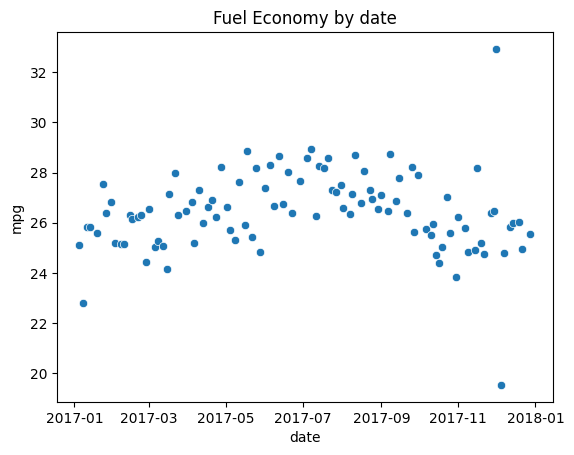

In [12]:
plot = sns.scatterplot(data = Econ17, x = 'date', y = 'mpg')

#plot = plt.scatter(pd.to_numeric(Econ16['date']), Econ16['mpg'])
plt.title('Fuel Economy by date')
plt.show()

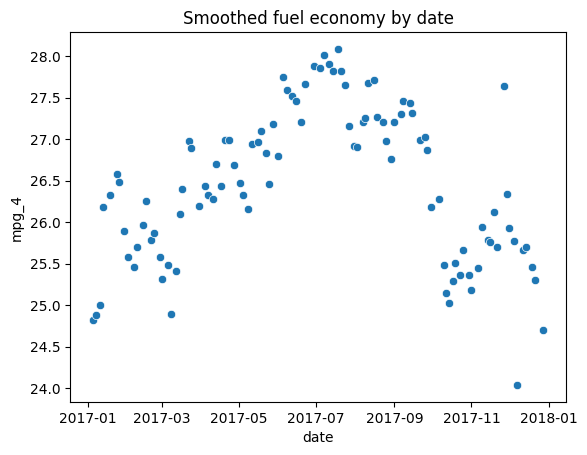

In [13]:

plt.close()

plot = sns.scatterplot(data = Econ17, x = 'date', y = 'mpg_4')
plt.title('Smoothed fuel economy by date')
plt.show()


Let's take a closer look at the fuel economy by month

In [14]:
plt.close()

Econ17[['mpg', 'month']].groupby('month').mean()


,mpg
month,
1,25.729334
2,25.618941
3,25.998633
4,26.657073
5,26.504051
6,27.477400
7,27.870275
8,27.158746
9,27.228816


/tmp/ipykernel_6773/4083421354.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Econ17['month_w'] = Econ17['month'].apply(month2names)


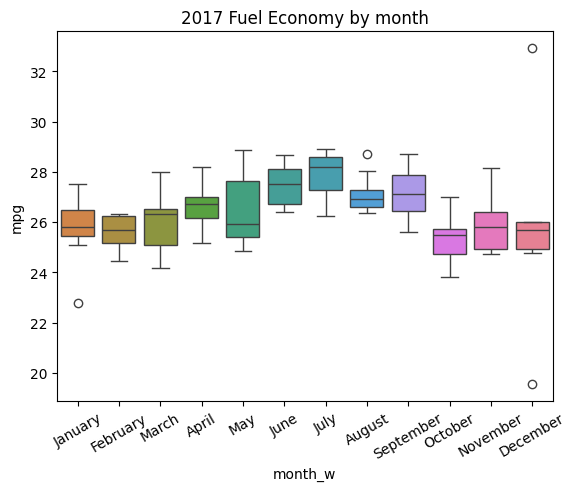

In [15]:
month_names = {1:'January',
2:'February',
3:'March',
4:'April',
5:'May', 
6:'June',
7:'July',
8:'August',
9:'September',
10:'October',
11:'November',
12:'December'}


def month2names(month):
  return month_names[month]


Econ17['month_w'] = Econ17['month'].apply(month2names)

plot_box = sns.boxplot(data = Econ17, x = 'month_w', y = 'mpg', hue = 'month_w', order = month_names.values())
plt.title('2017 Fuel Economy by month')
plt.xticks(rotation = 30)
plt.show()


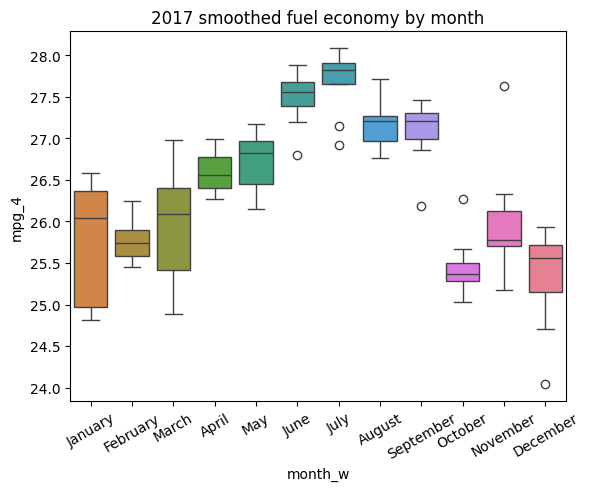

In [16]:

plt.close()

plot_box = sns.boxplot(data = Econ17, x = 'month_w', y = 'mpg_4', hue = 'month_w', order = month_names.values())
plt.title('2017 smoothed fuel economy by month')
plt.xticks(rotation = 30)
plt.show()



There's certinally a trend where the colder months have a lower fuel economy than the warmer months, this is especially nociced in the smoothed data. Perhaps this is partially explained by the tire choice, since in the colder months this vehicle uses winter tires for more traction. 

In [17]:

plt.close()


def month2tire_season(month):
  Tire_season = {
  1:'Winter',
  2:'Winter',
  3:'Winter',
  4:'Summer',
  5:'Summer',
  6:'Summer',
  7:'Summer',
  8:'Summer',
  9:'Summer',
  10:'Winter',
  11:'Winter',
  12:'Winter'}
  
  return Tire_season[month]
  
  
Econ17['tire_season'] = Econ17['month'].apply(month2tire_season)



/tmp/ipykernel_6773/2547782263.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Econ17['tire_season'] = Econ17['month'].apply(month2tire_season)


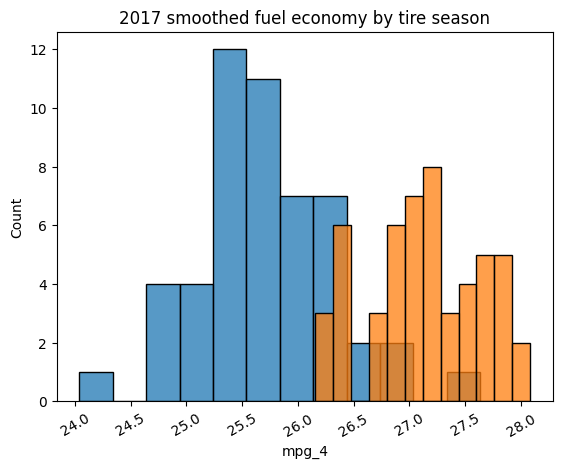

In [18]:

plot_hist = sns.histplot(data = Econ17[Econ17['tire_season'] == 'Winter'], x = 'mpg_4', bins = 12)
plot_hist = sns.histplot(data = Econ17[Econ17['tire_season'] == 'Summer'], x = 'mpg_4', bins = 12)
plt.title('2017 smoothed fuel economy by tire season')
plt.xticks(rotation = 30)
plt.show()



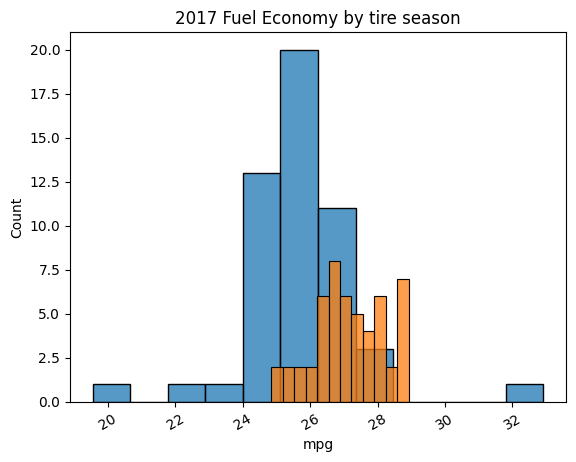

In [19]:

plt.close()

plot_hist = sns.histplot(data = Econ17[Econ17['tire_season'] == 'Winter'], x = 'mpg', bins = 12)
plot_hist = sns.histplot(data = Econ17[Econ17['tire_season'] == 'Summer'], x = 'mpg', bins = 12)
plt.title('2017 Fuel Economy by tire season')
plt.xticks(rotation = 30)
plt.show()


It certinally looks like tire season might be a contributing factor, but it doesn't explain all of the variance. 

In [20]:
plt.close()

winter_mpg = round(Econ17[Econ17['tire_season'] == 'Winter'].mpg_4.mean(),2)
summer_mpg = round(Econ17[Econ17['tire_season'] == 'Summer'].mpg_4.mean(),2)

winter_mpg_sd = round(Econ17[Econ17['tire_season'] == 'Winter'].mpg_4.std(),3)
summer_mpg_sd = round(Econ17[Econ17['tire_season'] == 'Summer'].mpg_4.std(),3)

seasonal_diff = round((summer_mpg - winter_mpg),2)

print(f'summer mpg (sd): {summer_mpg} ({summer_mpg_sd}) \nwinter mpg (sd): {winter_mpg} ({winter_mpg_sd}) \nseasonal mpg difference: {seasonal_diff}')


summer mpg (sd): 27.14 (0.514) 
winter mpg (sd): 25.72 (0.627) 
seasonal mpg difference: 1.42


In [21]:
# test for significant difference using 2 sample t-test
mpg_model_smoothed = stats.ttest_ind(Econ17[Econ17['tire_season'] == 'Winter'].mpg_4, Econ17[Econ17['tire_season'] == 'Summer'].mpg_4) 

print(f'winter vs. summer tire p-value: {round(mpg_model_smoothed.pvalue,24)}')


winter vs. summer tire p-value: 2.3e-22


This is a suspiciously low p-value. Why is this?

Previous test is not rigorous, because it includes smoothing, which decreases standard deviation.

The unsmoothed data should be used, providing a more accurate standard deviation


In [22]:
winter_mpg = round(Econ17[Econ17['tire_season'] == 'Winter'].mpg.mean(),2)
summer_mpg = round(Econ17[Econ17['tire_season'] == 'Summer'].mpg.mean(),2)

winter_mpg_sd = round(Econ17[Econ17['tire_season'] == 'Winter'].mpg.std(),3)
summer_mpg_sd = round(Econ17[Econ17['tire_season'] == 'Summer'].mpg.std(),3)



seasonal_diff = round((summer_mpg - winter_mpg),2)

print(f'summer mpg (sd): {summer_mpg} ({summer_mpg_sd}) \nwinter mpg (sd): {winter_mpg} ({winter_mpg_sd}) \nseasonal mpg difference: {seasonal_diff}')



summer mpg (sd): 27.15 (1.051) 
winter mpg (sd): 25.71 (1.673) 
seasonal mpg difference: 1.44


In [23]:
# test for significant difference using 2 sample t-test
mpg_model = stats.ttest_ind(Econ17[Econ17['tire_season'] == 'Winter'].mpg, Econ17[Econ17['tire_season'] == 'Summer'].mpg) 

print(f'winter vs. summer tire p-value:',round(mpg_model.pvalue,9))


winter vs. summer tire p-value: 7.88e-07



**Conclusions:**
  
  There is a significant association between the tires used and the fuel economy (p-value listed above).
  with summer tires are associated with a 1.44 improvement in mpg.
  
  Durring the month of July the best fuel economy is observed, with an average of 27.7 mpg. 
  
  Seasonal tire changes doesn't full explain differences in fuel economy, there 
  is still a noticable difference between months like April and May compared to 
  June, July, and August.
  
  Some of the unobserved variables in this data that might explain this trend are
  tire pressure, idle time, wind speed and direction, and fuel mix. 
  
  Concerning the analysis, when doing statistical testing, smoothed data should
  not be used, because it implies more precision than there is. 
  
  Smoothed data can be used to more easily see trends for visualization purposes, 
  and should always be stated as such, to avoid confusion.  

